# Regresión polinómica para más de una variable independiente y una variable dependiente
## Ejemplo: Predecir el precio de un inmueble de acuerdo al tamaño en metros cuadrados, el número de habitaciones y los años de construida
### 1. Librerías

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

### 2. Cargar el conjunto de datos

In [5]:
data = {
    "Tamaño": [100, 150, 200, 120, 180],  
    "Habitaciones": [2, 3, 4, 2, 3],     
    "Antigüedad": [10, 5, 2, 20, 8],     
    "Precio": [200000, 300000, 500000, 180000, 350000] 
}
df = pd.DataFrame(data)

### 3. Transformar X en características polinómicas (grado 2)

In [6]:
X = df[["Tamaño", "Habitaciones", "Antigüedad"]].values
y = df["Precio"].values

grado = 2
poly = PolynomialFeatures(degree=grado)
X_poly = poly.fit_transform(X)

### 4. Ajustar el modelo de regresión lineal a los datos transformados

In [7]:
modelo = LinearRegression()
modelo.fit(X_poly, y)

LinearRegression()

### 5. Predecir valores

In [8]:
y_pred = modelo.predict(X_poly)

### 6. Evaluar el modelo

In [9]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Coeficientes:", modelo.coef_)
print("Término independiente:", modelo.intercept_)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Coeficientes: [-2.26755503e-10 -4.61154361e+02 -1.24442272e+01  7.01554351e+01
  2.38979177e+01 -7.12144996e+02 -1.91720589e+02 -2.61199492e+01
 -3.03997911e+00  6.01087064e+02]
Término independiente: 280665.7546864552
Error cuadrático medio (MSE): 1.5051775472708917e-18
Coeficiente de determinación (R²): 1.0


## Predecir valores desconocidos (Interpolación)

### 1. Obtener los datos nuevos

In [10]:
nuevos_datos = np.array([
    [220, 4, 1],  # Casa grande, nueva
    [90, 2, 30]   # Casa pequeña, vieja
])

### 2. Transformar los nuevos datos usando el mismo objeto PolynomialFeatures

In [11]:
nuevos_datos_poly = poly.transform(nuevos_datos)

### 3. Predecir los valores para los nuevos datos

In [12]:
predicciones = modelo.predict(nuevos_datos_poly)

### 4. Mostrar las predicciones

In [13]:
print("\nNuevos datos:")
print(pd.DataFrame(nuevos_datos, columns=["Tamaño", "Habitaciones", "Antigüedad"]))
print("Predicciones de precios:", predicciones)


Nuevos datos:
   Tamaño  Habitaciones  Antigüedad
0     220             4           1
1      90             2          30
Predicciones de precios: [667196.27078945 329674.5592526 ]


## Visualización


### Generar datos para visualización

In [ ]:
tamanos = np.linspace(90, 220, 100)  
habitaciones = np.linspace(2, 4, 100)  
antiguedad = np.linspace(1, 30, 100) 

### 1. Relación entre Tamaño y Precio

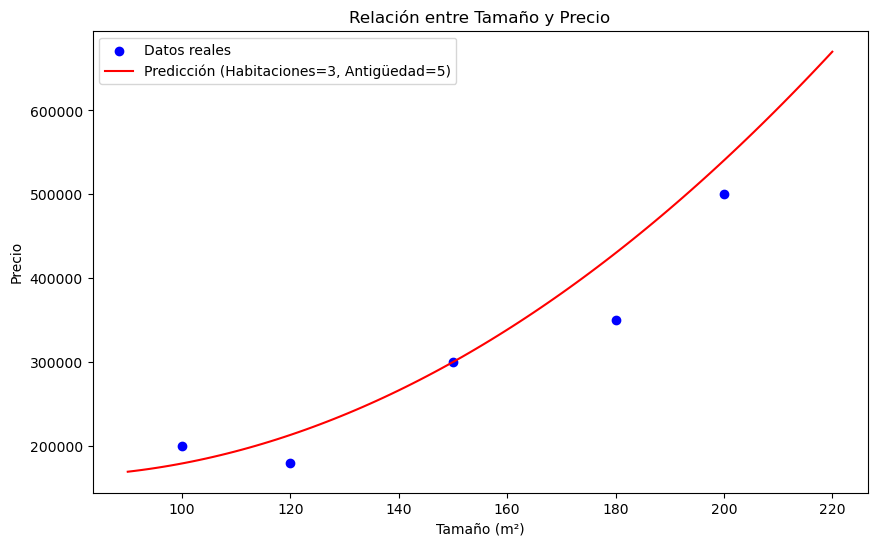

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Tamaño"], y, color="blue", label="Datos reales")
plt.plot(tamanos, modelo.predict(poly.transform(np.column_stack((tamanos, np.full_like(tamanos, 3), np.full_like(tamanos, 5))))),
         color="red", label="Predicción (Habitaciones=3, Antigüedad=5)")
plt.xlabel("Tamaño (m²)")
plt.ylabel("Precio")
plt.title("Relación entre Tamaño y Precio")
plt.legend()
plt.show()

### 2. Relación entre Tamaño, Habitaciones y Precio

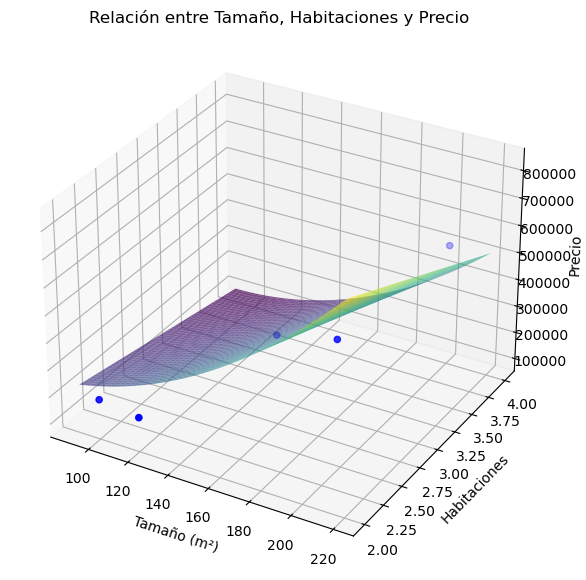

In [18]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Tamaño"], df["Habitaciones"], y, color="blue")

# Crear una malla para predecir
T, H = np.meshgrid(tamanos, habitaciones)
A = np.full_like(T, 5)  # Fijar antigüedad en 5 años
THA = np.column_stack((T.ravel(), H.ravel(), A.ravel()))
Z = modelo.predict(poly.transform(THA)).reshape(T.shape)

# Superficie de predicción
ax.plot_surface(T, H, Z, alpha=0.7, cmap="viridis", label="Predicción")
ax.set_xlabel("Tamaño (m²)")
ax.set_ylabel("Habitaciones")
ax.set_zlabel("Precio")
ax.set_title("Relación entre Tamaño, Habitaciones y Precio")
plt.show()

### Relación entre Tamaño, Habitaciones y Precio

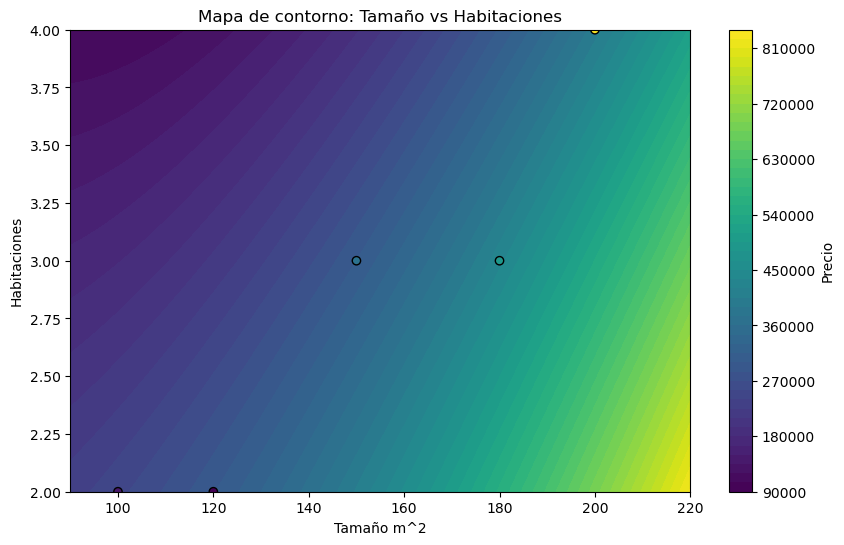

In [20]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(T, H, Z, levels=50, cmap="viridis")
plt.colorbar(contour, label="Precio")
plt.scatter(df["Tamaño"], df["Habitaciones"], c=y, edgecolor="k", cmap="viridis", label="Datos reales")
plt.xlabel("Tamaño m^2")
plt.ylabel("Habitaciones")
plt.title("Mapa de contorno: Tamaño vs Habitaciones")
plt.show()